In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


import seaborn as sn


import matplotlib.pyplot as plt


df=pd.read_csv('../../DATASETS/AHOGADOS/CSV/historico_inc_est_meteo_codigos_test.csv',sep='|',error_bad_lines=False)

In [2]:
df_stats=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'IdPronostico', 'Costa']]

In [3]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 14 columns):
Mes                5468 non-null float64
Edad               4510 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Presion            5468 non-null float64
Dir_viento         5463 non-null float64
V_Viento           5468 non-null int64
Nubosidad          5468 non-null float64
ProfNievecm        4218 non-null float64
Mortal             5468 non-null int64
IdPronostico       5468 non-null int64
Costa              5468 non-null int64
dtypes: float64(10), int64(4)
memory usage: 598.2 KB


In [4]:
#df_stats = df_stats[(df_stats['Mes'].between(6,9))]
df_stats = df_stats[(df_stats['Mes'].between(1,3))]

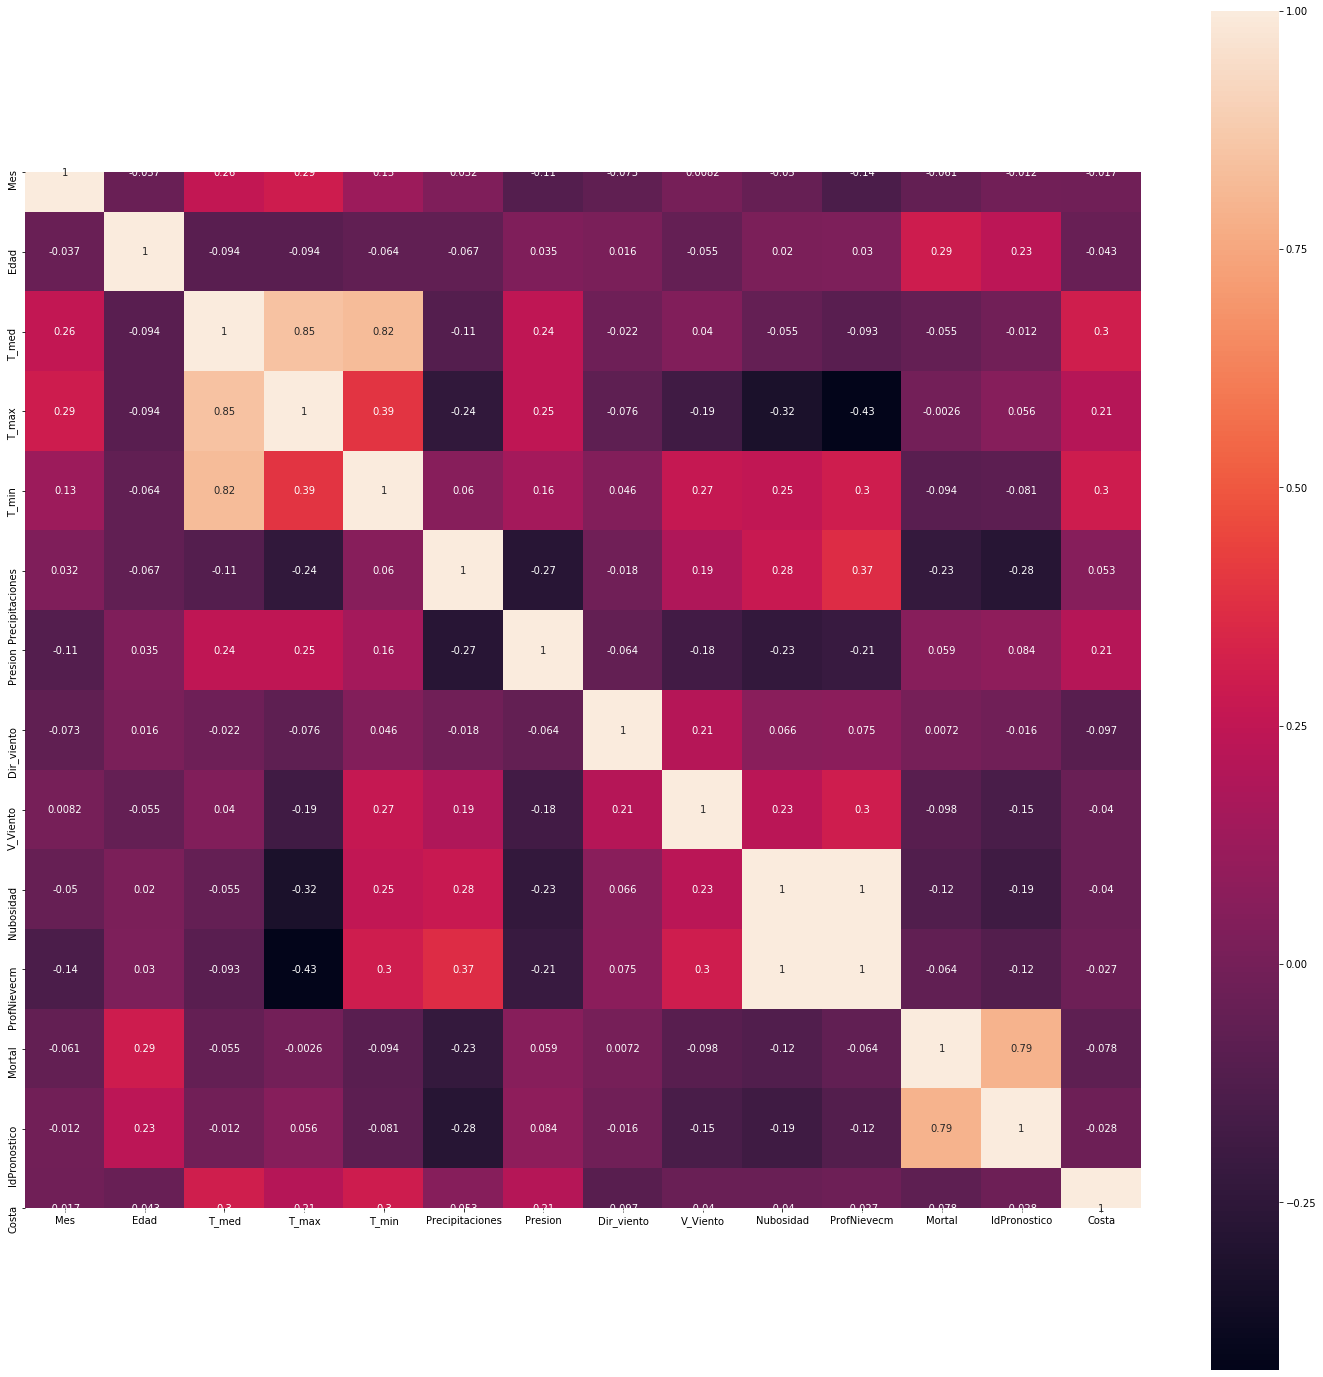

In [5]:
plt.figure(figsize=(25,25))

corrMatrix = df_stats.corr()
sn.heatmap(corrMatrix, annot=True, square=True)
plt.show()

In [6]:
c = corrMatrix.abs()
s = c.unstack()
so = s.sort_values(ascending=False , kind="quicksort")

In [7]:
so=so.to_frame() 

In [8]:
so.reset_index(inplace=True)

In [9]:
so.columns = ['Variable1', 'Variable2', 'correlacion']

In [10]:
so=so[so.Variable1 != so.Variable2]

In [11]:
so=so.drop_duplicates(subset=['correlacion'])

In [12]:
so.reset_index(inplace=True)

In [13]:
so.head(n=50)


index        Variable1        Variable2  correlacion
0      11        Nubosidad      ProfNievecm     1.000000
1      16            T_max            T_med     0.847193
2      18            T_min            T_med     0.822123
3      20     IdPronostico           Mortal     0.789701
4      22      ProfNievecm            T_max     0.425834
5      24            T_max            T_min     0.394171
6      26  Precipitaciones      ProfNievecm     0.366296
7      28        Nubosidad            T_max     0.323019
8      30            T_med            Costa     0.304303
9      32      ProfNievecm         V_Viento     0.303267
10     34            T_min      ProfNievecm     0.303222
11     36            T_min            Costa     0.297973
12     38             Edad           Mortal     0.293686
13     40              Mes            T_max     0.293612
14     42        Nubosidad  Precipitaciones     0.277842
15     44     IdPronostico  Precipitaciones     0.275996
16     46  Precipitaciones          Presion     0.270277
17     48         V_Viento            T_min     0.269529
18     50              Mes            T_med     0.255111
19     52        Nubosidad            T_min     0.250493
20     54            T_max          Presion     0.245459
21     56            T_med          Presion     0.243511
22     58  Precipitaciones            T_max     0.238434
23     60             Edad     IdPronostico     0.233435
24     62          Presion        Nubosidad     0.232392
25     64        Nubosidad         V_Viento     0.230793
26     66           Mortal  Precipitaciones     0.226102
27     68            Costa            T_max     0.212725
28     70         V_Viento       Dir_viento     0.212362
29     72      ProfNievecm          Presion     0.212293
30     74            Costa          Presion     0.209410
31     76         V_Viento  Precipitaciones     0.188444
32     78     IdPronostico        Nubosidad     0.187080
33     80         V_Viento            T_max     0.185670
34     82          Presion         V_Viento     0.177648
35     84            T_min          Presion     0.156871
36     86     IdPronostico         V_Viento     0.148279
37     88      ProfNievecm              Mes     0.144473
38     90              Mes            T_min     0.127167
39     92           Mortal        Nubosidad     0.124380
40     94     IdPronostico      ProfNievecm     0.117947
41     96  Precipitaciones            T_med     0.113649
42     98          Presion              Mes     0.109921
43    100           Mortal         V_Viento     0.098138
44    102       Dir_viento            Costa     0.097287
45    104             Edad            T_med     0.094345
46    106             Edad            T_max     0.094140
47    108           Mortal            T_min     0.093666
48    110      ProfNievecm            T_med     0.093110
49    112          Presion     IdPronostico     0.083959